In [1]:
#Dependences 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Take in all of our CitiBike data and read it into pandas
jan_2019 = "../Resources/JC-201901-citibike-tripdata 4 2.csv"
feb_2019 = "../Resources/JC-201902-citibike-tripdata.csv"
mar_2019 = "../Resources/JC-201903-citibike-tripdata.csv"
apr_2019 = "../Resources/JC-201904-citibike-tripdata.csv"
may_2019 = "../Resources/JC-201905-citibike-tripdata.csv"
june_2019 = "../Resources/JC-201906-citibike-tripdata.csv"
july_2019 = "../Resources/JC-201907-citibike-tripdata.csv"
aug_2019 = "../Resources/JC-201908-citibike-tripdata 2.csv"

#Create DataFrames for all the data files
jan_2019_df = pd.read_csv(jan_2019)
feb_2019_df = pd.read_csv(feb_2019)
mar_2019_df = pd.read_csv(mar_2019)
apr_2019_df = pd.read_csv(apr_2019)
may_2019_df = pd.read_csv(may_2019)
june_2019_df = pd.read_csv(june_2019)
july_2019_df = pd.read_csv(july_2019)
aug_2019_df = pd.read_csv(aug_2019)

In [3]:
#Merge all data from 2019 into one big data frame 
combined2019_CityBike_df = pd.merge(jan_2019_df, feb_2019_df, how='outer')
combined2019_CityBike_df3 = pd.merge(combined2019_CityBike_df,mar_2019_df, how = "outer")
combined2019_CityBike_df4 = pd.merge(combined2019_CityBike_df3,apr_2019_df, how = "outer")
combined2019_CityBike_df5 = pd.merge(combined2019_CityBike_df4,may_2019_df, how = "outer")
combined2019_CityBike_df6 = pd.merge(combined2019_CityBike_df5,june_2019_df, how = "outer")
combined2019_CityBike_df7 = pd.merge(combined2019_CityBike_df6,july_2019_df, how = "outer")
combined2019_CityBike_df8 = pd.merge(combined2019_CityBike_df7,aug_2019_df, how = "outer")

combined2019_CityBike_df8.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [4]:
combined2019_CityBike_df8["gender"] = combined2019_CityBike_df8["gender"].map(str)
combined2019_CityBike_df8["gender"] = combined2019_CityBike_df8["gender"].replace(['Unk','M','F'],['Unknown','Male','Female'])

combined2019_CityBike_df8 = combined2019_CityBike_df8.rename(columns = {"tripduration": "tripduration (seconds)"})
combined2019_CityBike_df8.head()

,tripduration (seconds),starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,201,2019-01-01 03:09:09.7110,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1
1,505,2019-01-01 05:18:00.1060,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2
2,756,2019-01-01 10:36:33.3400,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1
3,1575,2019-01-01 12:43:38.6430,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0
4,1566,2019-01-01 12:43:39.6010,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0


In [5]:
#Total count of rides for 2019
total_rides= len(combined2019_CityBike_df8["tripduration (seconds)"])
print(f"There were a total of {total_rides} rides between January 1, 2019 through August 31,2019")

There were a total of 262925 rides between January 1, 2019 through August 31,2019


In [6]:
# Create bins in which to place values based upon birth year
bins = [1900, 1946, 1964, 1979, 1994, 2015]
# Create labels for these bins
bin_labels = ["1900-1945", "1946-1964", "1965-1979", "1980-1994", "1995-2015"]

#Create a new column for which been each row falls into
combined2019_CityBike_df8["binned"] = pd.cut(combined2019_CityBike_df8["birth year"], bins)

#Get the value count for each bin group
bin_count = pd.cut(combined2019_CityBike_df8["birth year"], bins=bins).value_counts()

#Group by the binned column 
bin_group = combined2019_CityBike_df8.groupby("binned")

#Print the number of values in each bin group 
print(bin_group["birth year"].count())

binned
(1900, 1946]       134
(1946, 1964]     19405
(1964, 1979]     71396
(1979, 1994]    161815
(1994, 2015]     10079
Name: birth year, dtype: int64


Text(0, 0.5, 'Number of User')

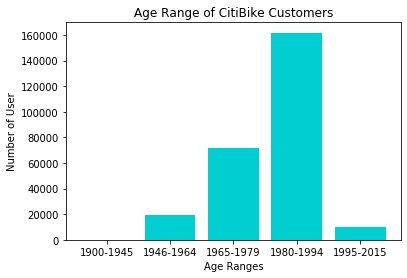

In [7]:
#Set the x and y axis
x_axis = bin_labels 
y = bin_group["birth year"].count()
#Create the bar chart 
plt.bar(x_axis, y, color = "darkturquoise")

#Set the labels and title
plt.title("Age Range of CitiBike Customers")
plt.xlabel("Age Ranges")
plt.ylabel("Number of User")

In [8]:
#Number of rides per month 
jan_rides = len(jan_2019_df["gender"])
feb_rides = len(feb_2019_df["gender"])
mar_rides = len(mar_2019_df["gender"])
apr_rides = len(apr_2019_df["gender"])
may_rides = len(may_2019_df["gender"])
june_rides= len(june_2019_df["gender"])
july_rides = len(july_2019_df["gender"])
aug_rides = len(aug_2019_df["gender"])

#Create a dictionary for the months and ride count 
months = {"Months": ["January","February","March","April","May","June","July","August"],
          "Count" : [jan_rides, feb_rides, mar_rides, apr_rides, may_rides, june_rides, july_rides, aug_rides]}

#Turn the months dictionary into a dataframe
total_rides = pd.DataFrame(months, columns = ["Months", "Count"])

total_rides

,Months,Count
0,January,19676
1,February,18565
2,March,23606
3,April,33056
4,May,36135
5,June,39430
6,July,43746
7,August,48711


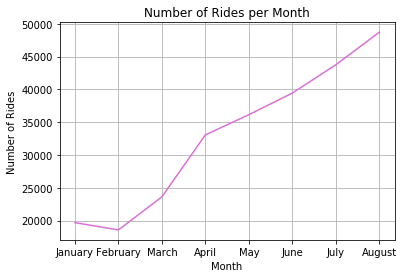

In [9]:
#Turn the total rides data frame into a line graph 
x_axis = total_rides["Months"] 
y_axis = total_rides["Count"]

plt.plot(x_axis, y_axis, color = "orchid")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per Month")
plt.grid()
plt.show()

In [10]:
startstation = combined2019_CityBike_df8.groupby(["start station name"])
startstationcount = startstation["start station name"].count()
#create new DataFrame
top5_start_stations = pd.DataFrame({"start station count": startstationcount})
#Sort the start station count column in descending order
top5_start_stations = top5_start_stations.sort_values(["start station count"], ascending = [False])
top5_start_stations.head()

,start station count
start station name,
Grove St PATH,30860
Hamilton Park,15181
Sip Ave,12214
Harborside,11350
Newport PATH,11268


In [11]:
endstation = combined2019_CityBike_df8.groupby(["end station name"])
endstationcount = endstation["end station name"].count()

#create new DataFrame
top5_end_stations = pd.DataFrame({"end station count": endstationcount})

#Sort the start station count column in descending order
top5_end_stations = top5_end_stations.sort_values(["end station count"], ascending = [False])
top5_end_stations.head()


,end station count
end station name,
Grove St PATH,37286
Hamilton Park,14313
Sip Ave,11524
Newport PATH,11473
Harborside,11342


In [12]:
bike_id = combined2019_CityBike_df8.groupby(["bikeid"])
bikecount = bike_id["bikeid"].count()
#create new DataFrame
top5_bikes = pd.DataFrame({"bike id count": bikecount})
#Sort the start station count column in descending order
top5_bikes = top5_bikes.sort_values(["bike id count"], ascending = [False])
top5_bikes.head()

,bike id count
bikeid,
26159,770
29242,751
29535,746
26275,737
29671,734


In [13]:
jancount2019 = len(jan_2019_df["tripduration"])
jantripduration2019 = jan_2019_df["tripduration"].sum()
janaveragetripduration2019 = jantripduration2019/jancount2019
minutes = janaveragetripduration2019/60
minutes.round(2)

7.45

In [14]:
combined2019_CityBike_df8['starttime'] = pd.to_datetime(combined2019_CityBike_df8['starttime'])
combined2019_CityBike_df8['date'] = combined2019_CityBike_df8['starttime'].dt.date
combined2019_CityBike_df8['time'] = combined2019_CityBike_df8['starttime'].dt.time

combined2019_CityBike_df8.head()

,tripduration (seconds),starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,binned,date,time
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.8790,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,"(1979, 1994]",2019-01-01,03:09:09.711000
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.9050,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,"(1964, 1979]",2019-01-01,05:18:00.106000
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.2600,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,"(1979, 1994]",2019-01-01,10:36:33.340000
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.5280,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,"(1964, 1979]",2019-01-01,12:43:38.643000
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.5100,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,"(1964, 1979]",2019-01-01,12:43:39.601000


In [15]:
combined2019_CityBike_df8['stoptime'] = pd.to_datetime(combined2019_CityBike_df8['stoptime'])
combined2019_CityBike_df8['end date'] = combined2019_CityBike_df8['stoptime'].dt.date
combined2019_CityBike_df8['end time'] = combined2019_CityBike_df8['stoptime'].dt.time

combined2019_CityBike_df8.head()

,tripduration (seconds),starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,binned,date,time,end date,end time
0,201,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,1,"(1979, 1994]",2019-01-01,03:09:09.711000,2019-01-01,03:12:30.879000
1,505,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,2,"(1964, 1979]",2019-01-01,05:18:00.106000,2019-01-01,05:26:25.905000
2,756,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,1,"(1979, 1994]",2019-01-01,10:36:33.340000,2019-01-01,10:49:10.260000
3,1575,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,0,"(1964, 1979]",2019-01-01,12:43:38.643000,2019-01-01,13:09:54.528000
4,1566,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,0,"(1964, 1979]",2019-01-01,12:43:39.601000,2019-01-01,13:09:46.510000


In [16]:
most_popular_routes_df = combined2019_CityBike_df8.groupby(['start station name',
                                                            'end station name'])\
                                                            .size().reset_index(name = 'Number of Trips')
most_popular_routes_df.head(10)

,start station name,end station name,Number of Trips
0,5 Corners Library,5 Corners Library,62
1,5 Corners Library,Astor Place,16
2,5 Corners Library,Baldwin at Montgomery,19
3,5 Corners Library,Bergen Ave,13
4,5 Corners Library,Brunswick & 6th,10
5,5 Corners Library,Brunswick St,23
6,5 Corners Library,Christ Hospital,82
7,5 Corners Library,City Hall,7
8,5 Corners Library,Columbus Dr at Exchange Pl,7
9,5 Corners Library,Columbus Drive,12


In [17]:
most_popular_routes_df = combined2019_CityBike_df8.groupby(["start station name",
                                                            "end station name"])\
                                                            .size().reset_index(name = "Number of Trips")
most_popular_routes_df = most_popular_routes_df.sort_values(["Number of Trips"], ascending = False)
most_popular_routes_df.head()

,start station name,end station name,Number of Trips
992,Hamilton Park,Grove St PATH,5407
939,Grove St PATH,Hamilton Park,4035
224,Brunswick & 6th,Grove St PATH,3268
1404,Jersey & 6th St,Grove St PATH,2925
274,Brunswick St,Grove St PATH,2840


In [18]:
most_popular_routes_df["station name"] = most_popular_routes_df["start station name"].str.cat(most_popular_routes_df["end station name"],sep= " to ")
most_popular_routes_df.head()

,start station name,end station name,Number of Trips,station name
992,Hamilton Park,Grove St PATH,5407,Hamilton Park to Grove St PATH
939,Grove St PATH,Hamilton Park,4035,Grove St PATH to Hamilton Park
224,Brunswick & 6th,Grove St PATH,3268,Brunswick & 6th to Grove St PATH
1404,Jersey & 6th St,Grove St PATH,2925,Jersey & 6th St to Grove St PATH
274,Brunswick St,Grove St PATH,2840,Brunswick St to Grove St PATH


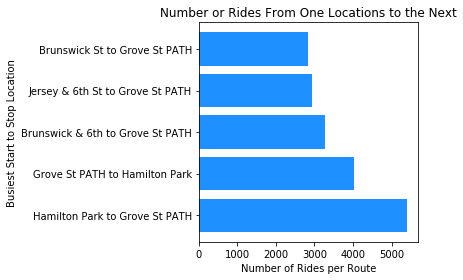

In [19]:
routes_x_axis = most_popular_routes_df["station name"].head()
routes_y_axis = most_popular_routes_df["Number of Trips"].head()

plt.barh(routes_x_axis, routes_y_axis, color = "dodgerblue")
plt.title("Number or Rides From One Locations to the Next")
plt.xlabel("Number of Rides per Route")
plt.ylabel("Busiest Start to Stop Location")
plt.tight_layout()
plt.show()

In [20]:
#combined2019_CityBike_df8['time'] = combined2019_CityBike_df8['time'].map(str)
#combined2019_CityBike_df8["time"].copy()[combined2019_CityBike_df8["time"].str.contains(r'<', na=False)]= ""
#new_df= combined2019_CityBike_df8[combined2019_CityBike_df8["time"]!= ""]
#new_df.head()

In [21]:
# Create bins in which to place values based upon birth year
#time_bins = [0, 6, 12, 18, 24]

# Create labels for these bins
#time_bin_labels = ["12am-5:59am", "6am-11:59am", "12pm-5:59pm", "6pm-11:59pm"]

#Create a new column for which been each row falls into
#new_df["time bin"] = pd.cut(new_df["time"], bins)

#Get the value count for each bin group
#time_bin_count = pd.cut(new_df["time"], bins=bins).value_counts()


In [25]:
#Drop pins on the most popular start and stop locations 
import gmaps
from config import g_key

location_df = combined2019_CityBike_df8[["start station name", "start station latitude",
                                         "start station longitude", "end station id", "end station name", 
                                         "end station latitude","end station longitude"]]

location_df.head()

,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude
0,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486
1,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483
2,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701
3,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483
4,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483


In [28]:
pop_locations = location_df.groupby(["start station name", "start station latitude", "start station longitude",
                                     "end station name", "end station latitude", "end station longitude"])\
                                        .size().reset_index(name = "Number of Trips")
pop_locations= pop_locations.sort_values(["Number of Trips"], ascending = False)
pop_locations.head()

,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,Number of Trips
1006,Hamilton Park,40.727596,-74.044247,Grove St PATH,40.719586,-74.043117,5407
952,Grove St PATH,40.719586,-74.043117,Hamilton Park,40.727596,-74.044247,4035
228,Brunswick & 6th,40.726012,-74.050389,Grove St PATH,40.719586,-74.043117,3268
1421,Jersey & 6th St,40.725289,-74.045572,Grove St PATH,40.719586,-74.043117,2925
279,Brunswick St,40.724176,-74.050656,Grove St PATH,40.719586,-74.043117,2840


In [37]:
#Set up varibales to for map 
start_locations = pop_locations[["start station latitude", "start station longitude"]].astype(float)
end_locations = pop_locations[["end station latitude", "end station longitude"]].astype(float)

In [38]:
#Create the marker layer map 
fig = gmaps.figure(center=(48.0, 0.0), zoom_level=2)

start_marker_layer =  gmaps.marker_layer(start_locations.head(), hover_text='', label='')

fig.add_layer(start_marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
##Create the heat layer map 
fig = gmaps.figure(center=(48.0, 0.0), zoom_level=2)

end_marker_layer =  gmaps.marker_layer(end_locations.head(), hover_text='', label='')

fig.add_layer(end_marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))